In [4]:
import polars as pl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [5]:
colors = ['#cb17eb','#A4EB17', '#17EBC8', '#EB173A', '#ffde59']  
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=colors)

palette = ['#cb17eb','#A4EB17', '#17EBC8', '#EB173A', '#ffde59', '#ccff33', '#ff36ab', '#e0fbfc', '#3772ff', '#45062e']  
sns.set_palette(palette)

In [ ]:
path = r"C:\Users\Rudra\Desktop\rural-financial-inclusion-govt-scheme-recommendation\parquet-data\lev-14\data2\lev_14_mp.parquet"
pdf = pl.read_parquet(path)

cols = ['ITEM_CODE', 'VALUE_RS']

pdf = pdf[cols]

pdf = pdf.with_columns(
    [pl.col(col).cast(pl.Int16, strict=False) for col in pdf.columns]
)

pdf.null_count()


pdf = pdf.fill_null(strategy='forward')

print(f"Number of Item present {pdf['ITEM_CODE'].approx_n_unique()}")


df = pdf.to_pandas()  


Number of Item present 42


In [8]:
pdf.estimated_size(unit='mb')

3.5552902221679688

In [ ]:
pdf['ITEM_CODE'].unique().to_list()

# Functions

In [76]:
def auto_label_and_plot(col_name:str, map_dictionary:dict):
    df[col_name] = df['ITEM_CODE'].map(map_dictionary)
    
    if df[col_name].nunique() > 0 :
        display(df[col_name].value_counts())
        display(df[col_name].describe())
    
        plt.figure(figsize=(12, 8))
        sns.barplot(df.groupby([col_name])[col_name].count(), orient='h')
        plt.title(f"{col_name} Count")
        plt.show()
    else:
        df.drop(columns=f"{col_name}", inplace=True)
        print('No Graph due to no data for this category')

# Category Mapping

category
toilet articles                       28166
fuel and light                        28146
consumer services excl. conveyance    28106
beverages                             28052
conveyance                            28010
salt & sugar                          28004
pulses & products                     27944
other household consumables           27938
vegetables                            27934
edible oil                            27932
spices                                27926
cereals                               27890
packaged processed food               27834
milk & milk products                  27648
fruits (fresh)                        27234
served processed food                 26592
medical (non-hospitalization)         26064
fruits (dry)                          23794
tobacco                               23026
education                             17316
pan                                   17010
other consumer taxes & cesses         16824
entertainment          

count              637344
unique                 29
top       toilet articles
freq                28166
Name: category, dtype: object

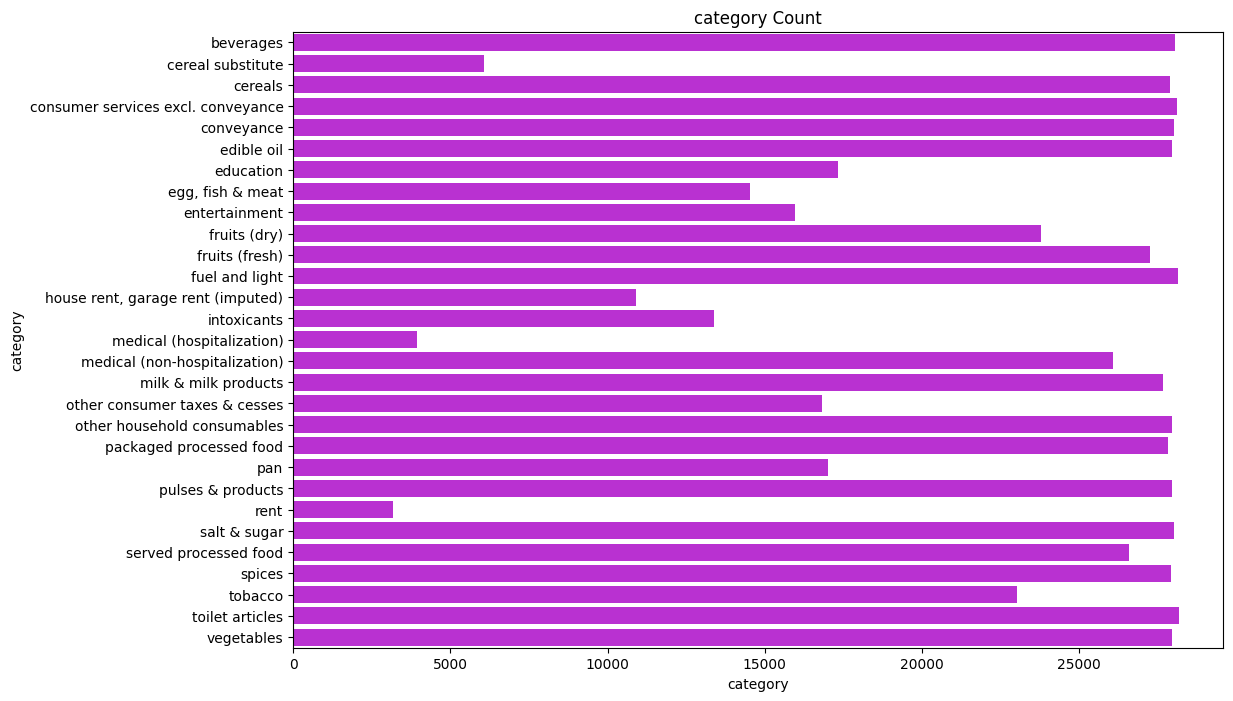

In [77]:
category_mapping = {
    129: "cereals",
    139: "cereal substitute",
    159: "pulses & products",
    179: "salt & sugar",
    169: "milk & milk products",
    219: "vegetables",
    239: "fruits (fresh)",
    249: "fruits (dry)",
    199: "egg, fish & meat",
    189: "edible oil",
    269: "spices",
    279: "beverages",
    289: "served processed food",
    299: "packaged processed food",
    349: "fuel and light",
    459: "toilet articles",
    479: "other household consumables",
    409: "education",
    419: "medical (hospitalization)",
    429: "medical (non-hospitalization)",
    519: "conveyance",
    499: "consumer services excl. conveyance",
    439: "entertainment",
    529: "rent",
    539: "house rent, garage rent (imputed)",
    899: "other consumer taxes & cesses",
    309: "pan",
    319: "tobacco",
    329: "intoxicants",
}

auto_label_and_plot(col_name='category', map_dictionary=category_mapping)

In [94]:
pdf['ITEM_CODE'].unique().to_list()

[99,
 129,
 139,
 159,
 169,
 179,
 189,
 199,
 219,
 239,
 249,
 269,
 279,
 289,
 299,
 309,
 319,
 329,
 349,
 379,
 389,
 399,
 409,
 419,
 429,
 439,
 459,
 479,
 499,
 519,
 529,
 539,
 559,
 569,
 579,
 599,
 609,
 619,
 629,
 639,
 649,
 899]

# Cereals

In [79]:
cereal_mapping = {
    61: "rice-free",
    62: "wheat/atta-free",
    70: "coarse grains-free",
    101: "rice – PDS",
    102: "rice – other sources",
    103: "chira",
    105: "muri",
    106: "other rice products (khoi/lawa, etc.)",
    107: "wheat/atta – PDS",
    108: "wheat/atta – other sources",
    110: "maida",
    111: "suji/rawa",
    112: "vermicelli (sewai)",
    114: "other wheat products",
    1: "coarse grains – PDS",
    2: "coarse grains – other sources",
    122: "other cereals & products",
    #129: "cereals: sub-total",
    #139: "cereal substitutes (tapioca, etc.)"
}


auto_label_and_plot(col_name='cereal_category', map_dictionary=cereal_mapping )

No Graph due to no data for this category


# Pulses

In [80]:
pulses_mapping = {
    140: "arhar/tur",
    141: "gram: split",
    142: "gram: whole",
    143: "moong",
    144: "masur",
    145: "urd",
    146: "peas/chickpeas",
    148: "other pulses (khesari, etc.)",
    150: "besan/gram products",
    152: "other pulse products (soya chunks, etc.)",
    158: "pulses – PDS",
    71: "pulses – free",
    72: "gram – free",
    # 159: "pulses & pulse products: sub-total"
}

auto_label_and_plot(col_name='pules_category', map_dictionary=pulses_mapping)

No Graph due to no data for this category


# Salt & Sugar

In [81]:
salt_sugar_mapping = {
    73: "salt – free",
    74: "sugar – free",
    178: "salt – PDS",
    170: "salt – other sources",
    171: "sugar – PDS",
    172: "sugar – other sources",
    173: "jaggery (gur)",
    174: "candy/misri",
    175: "honey",
    #179: "salt & sugar: sub-total"
}

auto_label_and_plot(col_name='salt_sugar_category',  map_dictionary=salt_sugar_mapping)

No Graph due to no data for this category


# Milk 

In [82]:
milk_mapping = {
    160: "milk: liquid",
    162: "milk: condensed/powder",
    163: "curd/yogurt",
    164: "ghee",
    165: "butter",
    166: "ice-cream",
    3: "paneer",
    4: "prepared sweets",
    5: "cheese",
    92: "other milk products (lassi, buttermilk, etc.)",
    # 169: "milk & milk products: sub-total"
}

auto_label_and_plot(col_name='milk_category', map_dictionary=milk_mapping)

No Graph due to no data for this category


# Vegetables

In [83]:
vegetables_mapping = {
    200: "potato",
    201: "onion",
    202: "tomato",
    203: "brinjal",
    204: "radish",
    205: "carrot",
    206: "leafy vegetables",
    207: "green chillies",
    208: "lady’s finger",
    210: "parwal/patal/kundru",
    211: "cauliflower",
    212: "cabbage",
    213: "gourd/pumpkin",
    214: "peas",
    215: "beans/barbati",
    216: "lemon",
    217: "other vegetables",
    # 219: "vegetables: sub-total"
}


auto_label_and_plot(col_name='vegetables_category', map_dictionary=vegetables_mapping)

No Graph due to no data for this category


# Fresh Fruits

In [84]:
fruits_fresh_mapping = {
    220: "banana",
    224: "coconut",
    225: "green coconut",
    226: "guava",
    228: "orange/sweet lime (mausami)",
    230: "papaya",
    231: "mango",
    232: "kharbooza",
    236: "apple",
    237: "grapes",
    222: "watermelon",
    93: "other fresh fruits (litchi, pineapple, etc.)",
    # 239: "fruits (fresh): sub-total"
}

auto_label_and_plot(col_name='fresh_fruit_category', map_dictionary=fruits_fresh_mapping)

No Graph due to no data for this category


# Dry Fruits

In [85]:
fruits_dry_mapping = {
    240: "coconut: copra",
    241: "groundnut",
    242: "dates",
    243: "cashew nut",
    245: "other nuts (almond, pistachio, walnut, etc.)",
    246: "raisin/kishmish",
    94: "other dry fruits (apricot, fig, etc.)",
    # 249: "fruits (dry): sub-total"
}


auto_label_and_plot(col_name='fruits_dry_category', map_dictionary=fruits_dry_mapping)

No Graph due to no data for this category


# Non Veg

In [86]:
nonveg_mapping = {
    190: "eggs",
    191: "fish/prawn",
    192: "goat meat/mutton",
    193: "beef/buffalo meat",
    194: "pork",
    195: "chicken",
    196: "other meat (crab, oyster, etc.)",
    # 199: "egg, fish & meat: sub-total"
}

auto_label_and_plot(col_name='nonveg_category', map_dictionary=nonveg_mapping)

No Graph due to no data for this category


# Edible Oil

In [87]:
edible_oil_mapping = {
    181: "mustard oil",
    182: "groundnut oil",
    183: "coconut oil",
    184: "refined oil",
    188: "edible oil – PDS",
    95: "other oils (vanaspati, margarine, etc.)",
    75: "edible oil – free",
    # 189: "edible oil: sub-total"
}

auto_label_and_plot(col_name='edible_oil_category', map_dictionary=edible_oil_mapping)

No Graph due to no data for this category


# Spices

In [88]:
spices_mapping = {
    250: "ginger",
    251: "garlic",
    252: "cumin",
    253: "coriander",
    254: "turmeric",
    255: "black pepper",
    256: "dry chillies",
    257: "tamarind",
    258: "curry powder",
    260: "oilseeds",
    261: "other spices",
    263: "poppy seeds",
    # 269: "spices: sub-total"
}

auto_label_and_plot(col_name='spices_category', map_dictionary=spices_mapping)

No Graph due to no data for this category


# Beverages

In [89]:
beverages_mapping = {
    11: "soda drinks",
    270: "tea: cups",
    271: "tea: leaf",
    272: "coffee: cups",
    273: "coffee: powder",
    274: "mineral water",
    275: "other cold beverages",
    276: "fruit juice/shake",
    278: "other beverages (cocoa, health drinks)",
    # 279: "beverages: sub-total"
}

auto_label_and_plot(col_name='beverages_category', map_dictionary=beverages_mapping)

No Graph due to no data for this category


# Served Processed Food

In [90]:
served_processed_mapping = {
    76: "cooked meals purchased at subsidized rate",
    280: "cooked meals purchased",
    281: "cooked meals received free in workplace",
    282: "cooked meals received as assistance",
    283: "cooked snacks purchased",
    284: "other served processed food",
    # 289: "served processed food: sub-total"
}

auto_label_and_plot(col_name='served_food_category', map_dictionary=served_processed_mapping)

No Graph due to no data for this category


# JPackaged Processed Food

In [91]:
packaged_processed_mapping = {
    12: "breakfast cereals",
    13: "biscuits",
    14: "health supplements",
    15: "noodles",
    113: "bread (bakery)",
    161: "baby food",
    290: "cake/pastry",
    291: "chocolates",
    292: "namkeen/papad/bhujia",
    293: "chips/wafers/nachos",
    294: "pickles",
    295: "sauce/jam/jelly/mayonnaise",
    296: "other packaged processed food",
    # 299: "packaged processed food: sub-total"
}

auto_label_and_plot(col_name='packaged_food_category', map_dictionary=packaged_processed_mapping)

No Graph due to no data for this category


In [92]:
df.columns

Index(['ITEM_CODE', 'VALUE_RS', 'category'], dtype='object')

In [93]:
# Done 🙌